### 对两种过滤器的对比分析

In [1]:
import tensorflow as tf
tf.__version__

'2.6.2'

In [2]:
from sklearn.datasets import load_sample_image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
def plot_image(image):
    plt.imshow(image,cmap='gray',interpolation='nearest')

def plot_color_image(image):
    plt.imshow(tf.cast(image,np.uint8),interpolation='nearest')

In [5]:
china=load_sample_image("china.jpg")
china.shape

(427, 640, 3)

In [7]:
image = china[150:220, 130:250]
height, width, channels = image.shape
image.shape

(70, 120, 3)

In [10]:
image_grayscale = image.mean(axis=2).astype(np.float32) #沿着图像的第三个维度（通道维度）计算每个像素的平均值，因此得到的结果是一个灰度图像  #将彩色图像转换为灰度图像
images = image_grayscale.reshape(1, height, width, 1) #将其重新形状为适合神经网络输入的形式

In [12]:
image_grayscale.shape

(70, 120)

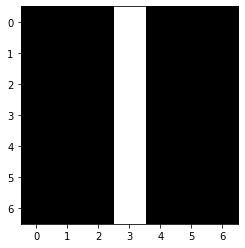

In [13]:
fmap=np.zeros(shape=(7,7,1,2), dtype=np.float32) #7x7大小的平面，有1个通道，有2个这样的平面
fmap[:, 3, 0, 0] = 1 #垂直白线
fmap[3, :, 0, 1] = 1 #水平白线
plot_image(fmap[:, :, 0, 0])
plt.show()

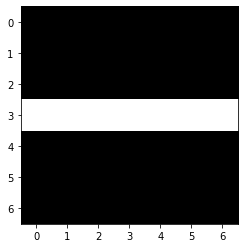

In [14]:
plot_image(fmap[:, :, 0, 1])
plt.show()

In [15]:
feature_maps = tf.constant(fmap) #将之前定义的 fmap 数组转换为 TensorFlow 常量
convolution = tf.nn.conv2d(images, feature_maps, 
                           strides=[1,1,1,1], 
                           padding="SAME")

<function matplotlib.pyplot.show(close=None, block=None)>

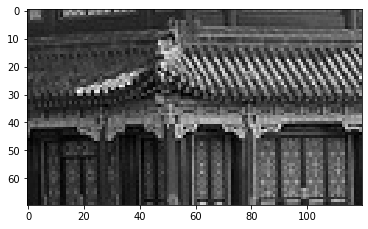

In [16]:
plot_image(images[0,:,:,0])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

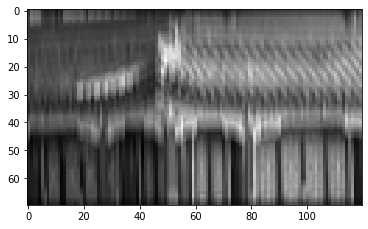

In [18]:
plot_image(convolution[0,:,:,0])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

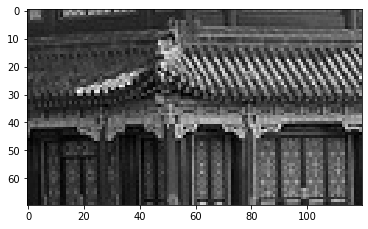

In [19]:
plot_image(images[0,:,:,0])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

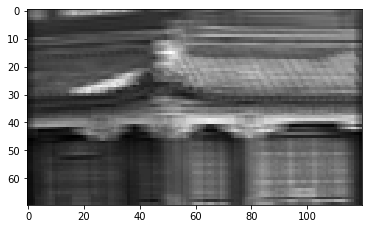

In [20]:
plot_image(convolution[0,:,:,1]) #[batch, height, width, out_channels]
plt.show